LOAD DATA

In [12]:
import json
import zipfile
import os
api_token = {"username":"mine777","key":"a0f13c0d9319f4af3ae671c38b7fca88"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d mikful/orchids

 99% 1.06G/1.07G [00:18<00:00, 70.8MB/s]
100% 1.07G/1.07G [00:18<00:00, 63.2MB/s]


In [43]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/orchids.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [44]:
# Path Directory
brassia_dir = '/content/dataset/Brassia'
miltonia_dir = '/content/dataset/Miltonia'

In [45]:
# Pastikan Folder hanya berisi jpg
import os
base_dataset = "/content/dataset"
class_dir = ['Brassia','Miltonia']
count = 0
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpg"):
        os.remove(os.path.join(cur_dir, item))
        count += 1

print("Jumlah Selain .png:", count)

Jumlah Selain .png: 35


In [46]:
# Splitting
!pip install split_folders

In [47]:
# Import data splitfolders
import splitfolders

input_dir = '/content/dataset'
output_dir = input_dir + '/model_dataset'

splitfolders.ratio(input_dir, output=output_dir, seed=247, ratio=(.7,.3))

Copying files: 6024 files [00:09, 628.31 files/s]


In [48]:
brassia_train_dir = '/content/dataset/model_dataset/train/Brassia'
brassia_val_dir = '/content/dataset/model_dataset/val/Brassia'
miltonia_train_dir = '/content/dataset/model_dataset/train/Miltonia'
miltonia_val_dir = '/content/dataset/model_dataset/val/Miltonia'

In [49]:
# Cek penamaan image
print(os.listdir(brassia_train_dir)[:5])
print(os.listdir(miltonia_train_dir)[:5])

['51.Brassia_verrucosa_Orchi_01.jpg', '295.3529852650_a58696ed1c_b.jpg', '2.4540326075_97fd2b8023_b.jpg', '197.51bZkrRvGVL._SY679_.jpg', '255.QO7BrassRex-2.jpg']
['174.Miltonia-38771.jpg', '231.43fa7cf5d1fe433d0cb96ec101ba4867.jpg', '232.17494401-violeta-orqu%C3%ADdea-miltonia-spectabilis-probablemente.jpg', '220.Miltonia_spectabilis.jpg', '226.description-and-photo-of-species-of-miltonia-orchids-2.jpg']


In [51]:
print("Total brassia:", len(os.listdir('/content/dataset/Brassia')))
print("Total Training brassia:", len(os.listdir(brassia_train_dir)))
print("Total Value brassia:", len(os.listdir(brassia_val_dir)))
print("Total miltonia:", len(os.listdir('/content/dataset/Miltonia')))
print("Total Training miltonia:", len(os.listdir(miltonia_train_dir)))
print("Total Value miltonia:", len(os.listdir(miltonia_val_dir)))

Total brassia: 290
Total Training brassia: 203
Total Value brassia: 87
Total miltonia: 214
Total Training miltonia: 149
Total Value miltonia: 65


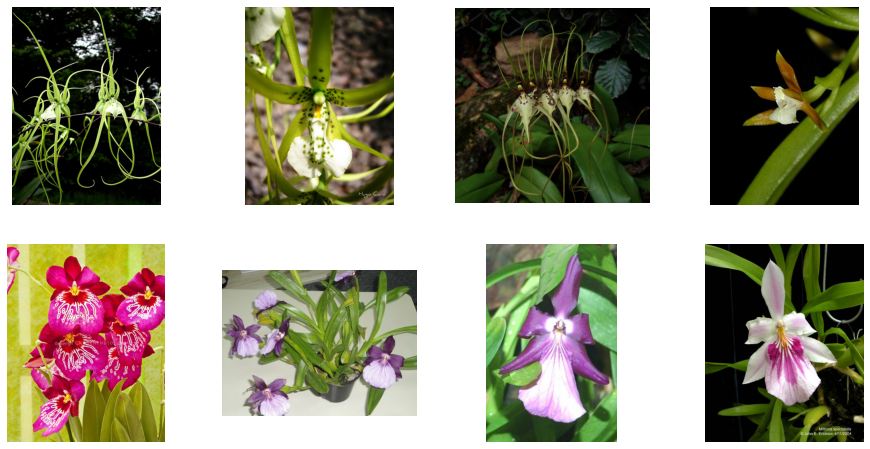

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

brassia_img = os.listdir(brassia_dir)
miltonia_img = os.listdir(miltonia_dir)

nrows = 2
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

brassia_name_dir = [os.path.join(brassia_train_dir, fname) for fname in os.listdir(brassia_train_dir)[:4]]
miltonia_name_dir = [os.path.join(miltonia_train_dir, fname) for fname in os.listdir(miltonia_train_dir)[:4]]

for i, img_path in enumerate(brassia_name_dir+miltonia_name_dir):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

PREPROCESSING

In [66]:
train_dir = '/content/dataset/model_dataset/train'
val_dir = '/content/dataset/model_dataset/val'

In [67]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

for dirpath, dirnames, filenames in os.walk(train_dir):
    for file in filenames:
        if ".png" in file:
            imagePath = os.path.join(dirpath, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [68]:
# Gather data val
val_data = []
val_label = []

for dirpath, dirnames, filenames in os.walk(val_dir):
    for file in filenames:
        if ".png" in file:
            imagePath = os.path.join(dirpath, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [69]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (75, 150, 150, 3)
Train Label =  (75,)
Validation Data =  (42, 150, 150, 3)
Validation Label =  (42,)


In [70]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][50])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][50])

Data sebelum di-normalisasi  [211 162 209]
Data setelah di-normalisasi  [0.827451   0.63529414 0.81960785]


In [72]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


DEFINISIKAN MODEL

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten

MODEL MAX POOLING

In [74]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [75]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [77]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

MODEL AVERAGE POOLING

In [78]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())

In [79]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [80]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [81]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])